# Playground Series 1.02 🦆

## Imports

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## Read Dataset

In [2]:
data = pd.read_csv("../data/train.csv", index_col=  "id")
print(data.shape)
data.head()

(300000, 25)


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


## Multivariate Data Analysis

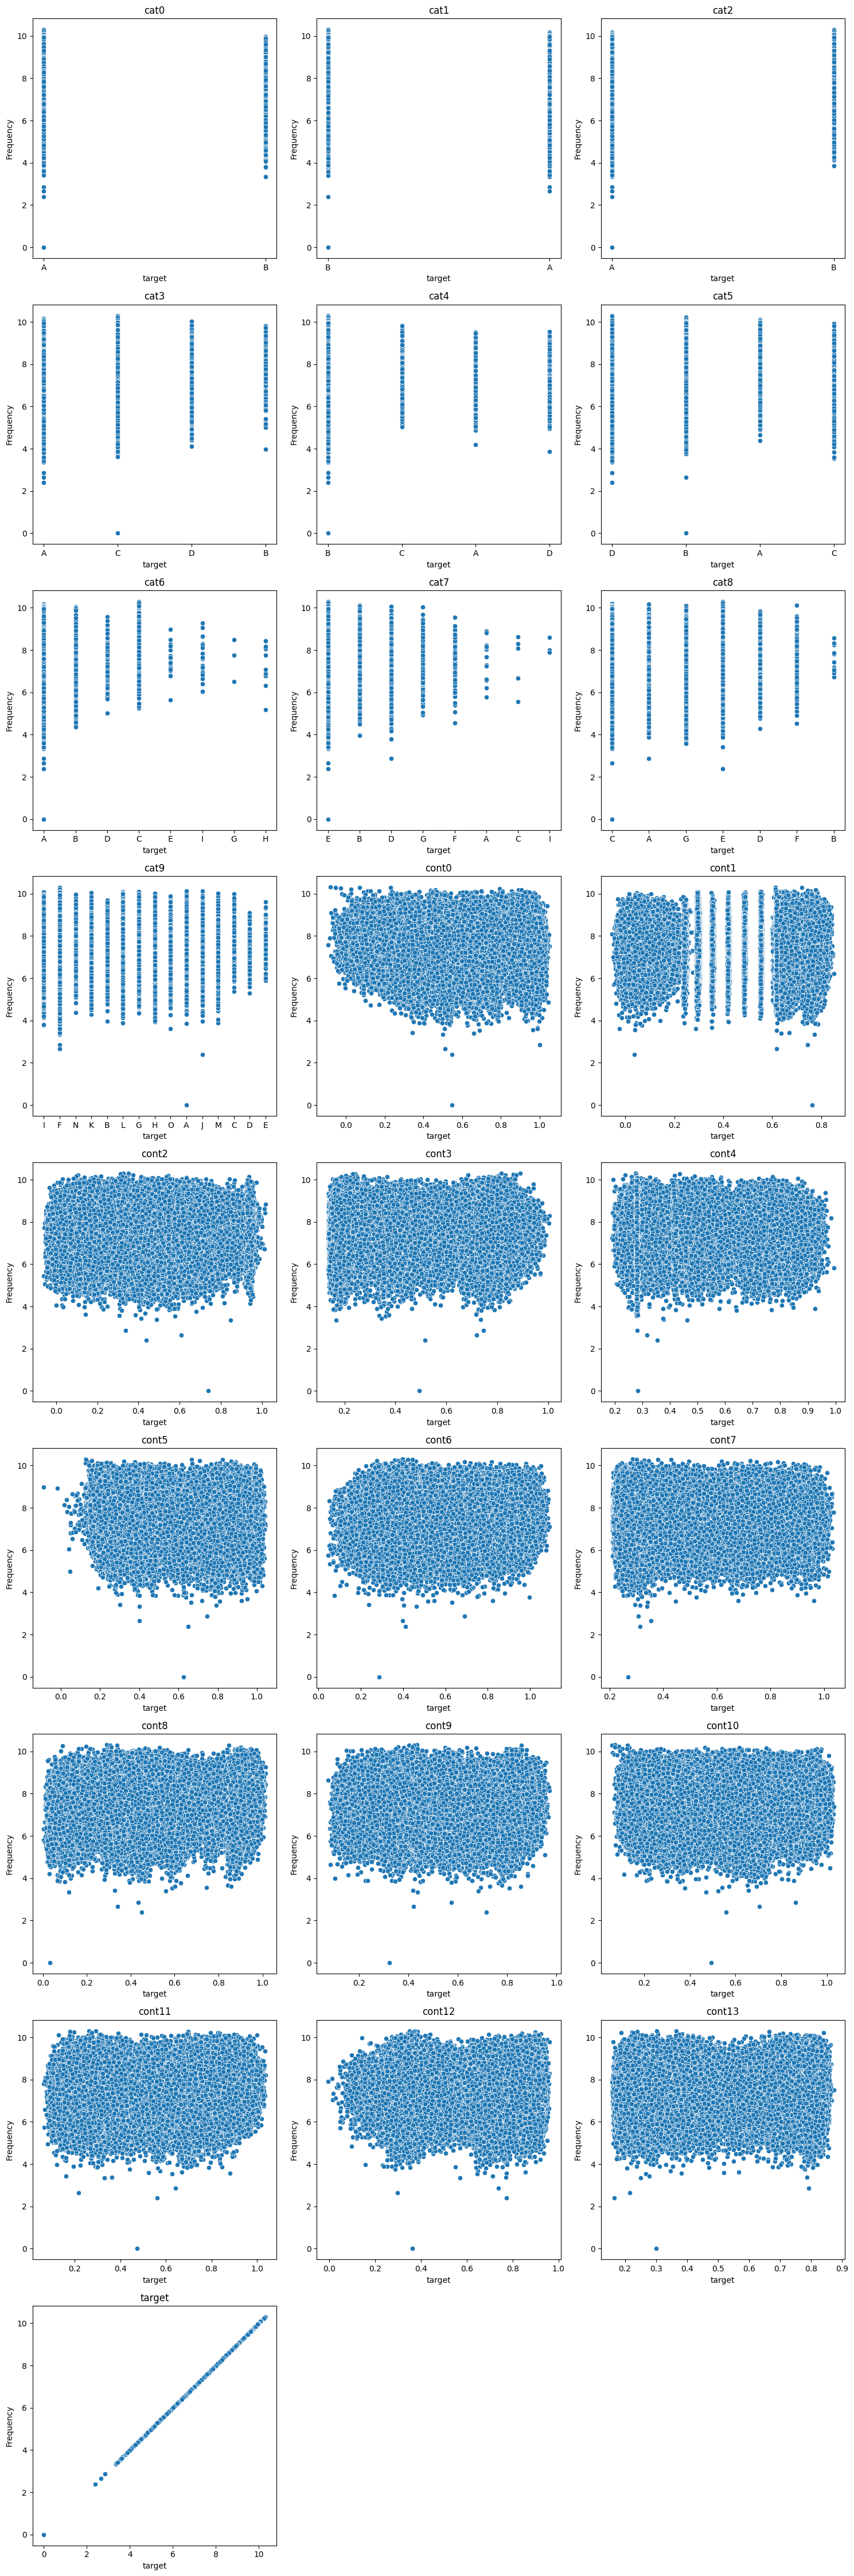

In [3]:
ncols = 3

nrows = -(-len(data.columns) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, variable in enumerate(data.columns):
    ax = axes[i]
    sns.scatterplot(data=data, ax=ax, x=variable, y="target")
    ax.set_title(variable)
    ax.set_xlabel("target")
    ax.set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
print(data['cat1'].unique())
print(data['target'].unique())
print(data[['cat1', 'target']].dropna().groupby('cat1').size())


['B' 'A']
[6.99402255 8.07125606 5.76045565 ... 7.60055795 8.27209531 6.02568526]
cat1
A    162678
B    137322
dtype: int64


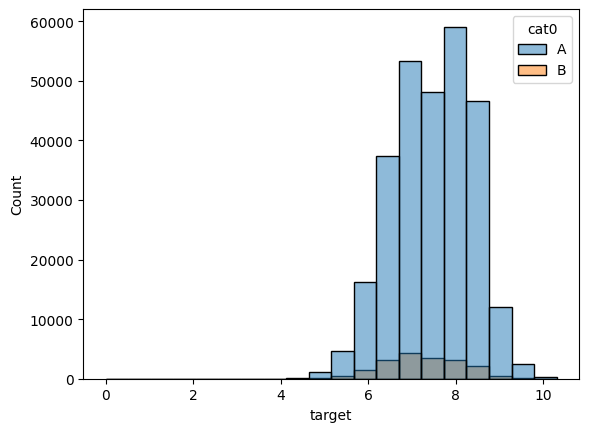

In [19]:
sns.histplot(data = data, x = "target", hue = "cat0", bins=20)
plt.show()

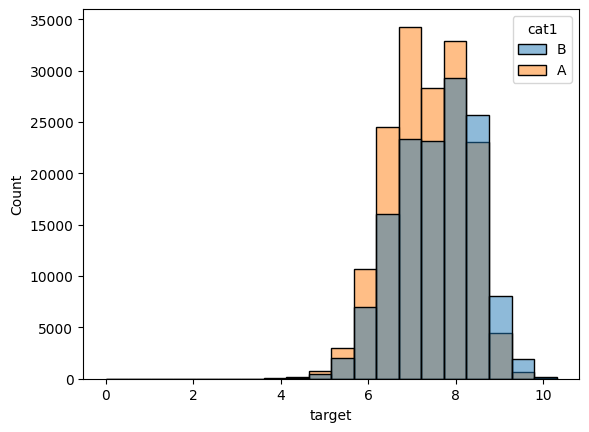

In [18]:
sns.histplot(data = data, x = "target", hue = "cat1", bins=20)
plt.show()

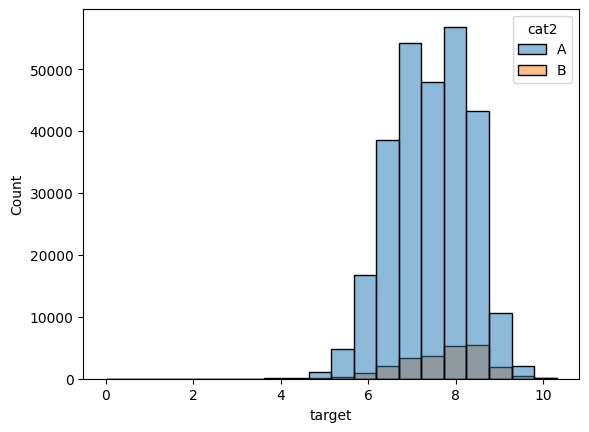

In [17]:
sns.histplot(data = data, x = "target", hue = "cat2", bins=20)
plt.show()

## Correlations

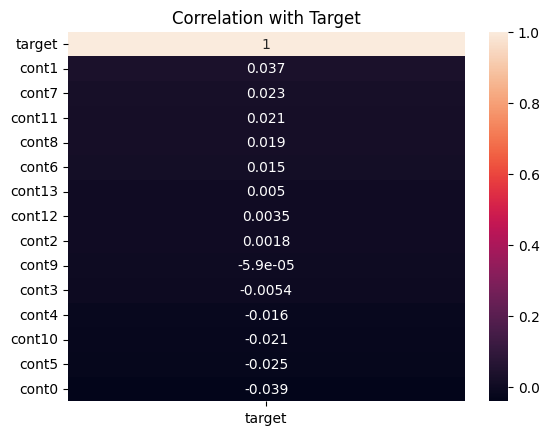

In [20]:
# Pearson correlation
numerical_vars = data.select_dtypes(include='number').columns.tolist()
corr = data[numerical_vars].corr(method="pearson")
sns.heatmap(corr[["target"]].sort_values(by="target", ascending=False), annot=True)
plt.title("Correlation with Target")
plt.show()

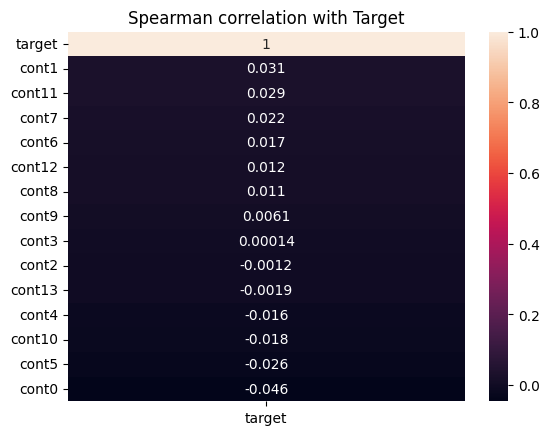

In [21]:
# Spearman correlation (captures monotonic relationships)
corr = data[numerical_vars].corr(method='spearman')
sns.heatmap(corr[["target"]].sort_values(by="target", ascending=False), annot=True)
plt.title("Spearman correlation with Target")
plt.show()

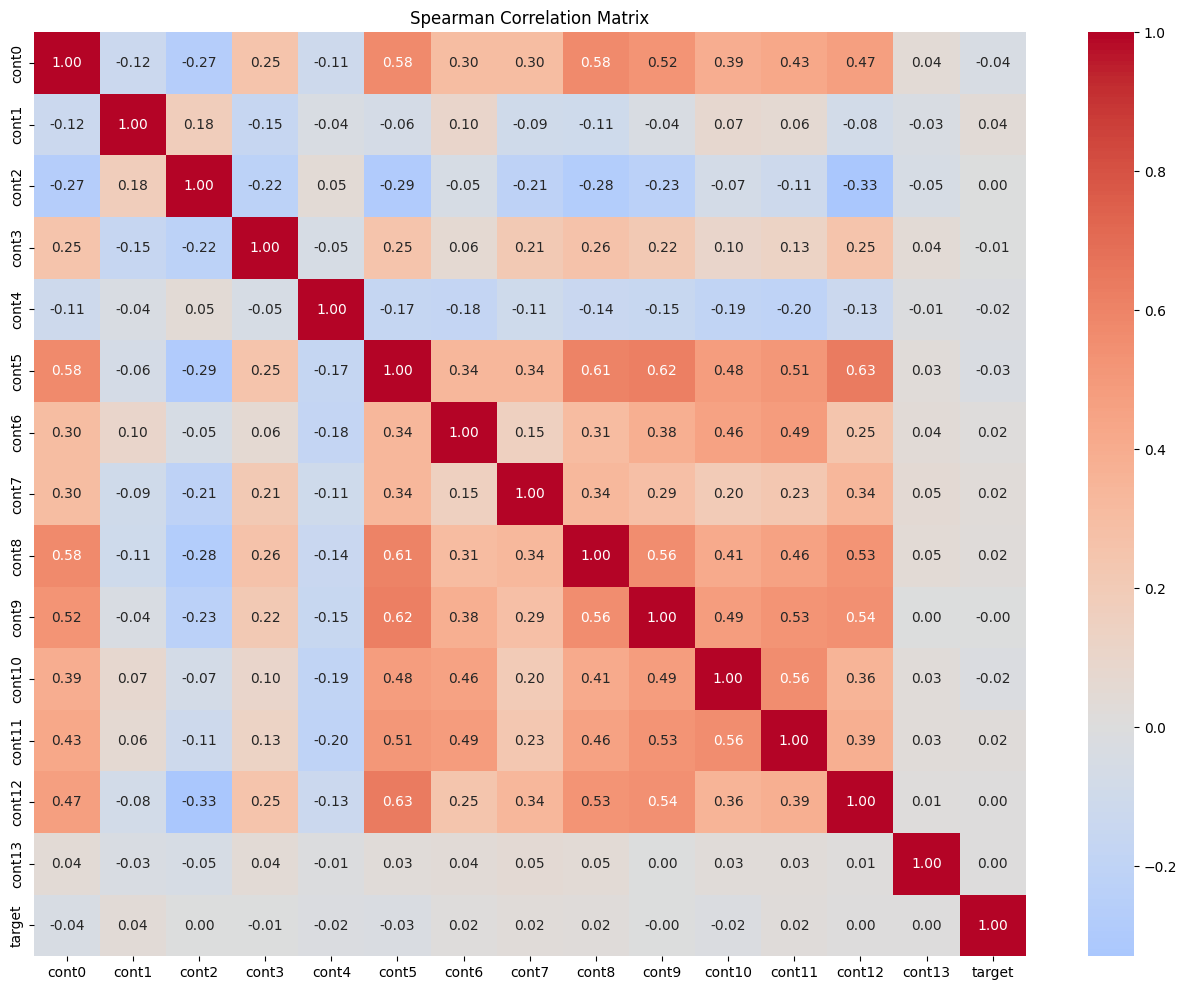

In [23]:
corr = data[numerical_vars].corr(method='pearson')

# Plot heatmap for the full correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Spearman Correlation Matrix")
plt.show()

## Feature Interactions

<Axes: xlabel='cont1', ylabel='cont2'>

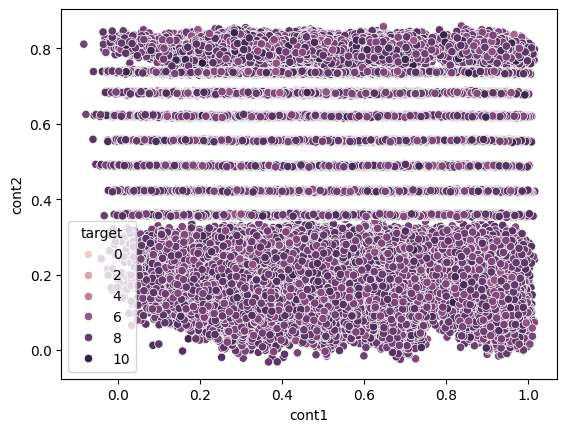

In [ ]:
sns.scatterplot(data=data, x='cont1', y='cont2', hue='target')
plt.show()